# Assignment 30.10.17 - Patrick Werner

## Exercise 0
Apparently I assumed incorrectly last time (I thought 2.13 - 2.16 was the reading material for the questions). Because of that I submitted my questions from last week again in a seperate textfile.

## Exercise 1
![Mindmap](mindmap.png)

## Exercise 2
a) VCdim = 4
b) VCdim = 3 
c) VCdim = 7 (after google search, I went up to 4)

## Exercise 3

In [1]:
import random as rand
import matplotlib.pyplot as plt
import numpy as np
rand.seed(1);

def contains(rect, point):
    return point[0] > rect[0] and point[0] < rect[1] and point[1] > rect[2] and point[1] < rect[3]

def generateSample(rect):
    x = rand.uniform(0, 100);
    y = rand.uniform(0, 100);
    return (x, y, contains(rect, (x,y)))

def generateSampleSet(rect, nSamples):
    sampleSet = []
    for i in range(0, nSamples):
        sampleSet.append(generateSample(rect))
    return sampleSet

def generateRectangle(minX, maxX, minY, maxY):
    a = rand.uniform(minX, maxX)
    b = rand.uniform(minX, maxX)
    if a > b:
        a, b = b, a
    c = rand.uniform(minY, maxY)
    d = rand.uniform(minY, maxY)
    if c > d:
        c, d = d, c
    return (a, b, c, d)

def consistentLearner(sampleSet):
    a = 0
    b = 0
    c = 0
    d = 0
    trainErr = 0
    # Train on the sample set
    for i in range(0, len(sampleSet)):
        x = sampleSet[i][0];
        y = sampleSet[i][1];
        if sampleSet[i][2]:
            if contains((a,b,c,d), (x,y)):
                #print('True inside')
                pass
            else:
                trainErr += 1
                #print('True outside')
                if a > x:
                    a = x
                if b < x:
                    b = x
                if c > y:
                    c = y
                if d < y:
                    d = y
        else:
            if contains((a,b,c,d), (x,y)):
                trainErr += 1
                #print("True inside")
                if a < x:
                    a = x
                if b > x:
                    b = x
                if c < y:
                    c = y
                if d > y:
                    d = y
            else:
                #print("False outside")
                pass
    trainErr /= len(sampleSet)
    return (a, b, c, d, trainErr)

# Generate multiple random rectangles
nRects = 1000
conceptRects = []
for i in range(0, nRects):
    conceptRects.append(generateRectangle(0, 100, 0, 100))


# Try different amounts of training samples
nTrainSamples = np.arange(1, 50)
trainErrs = []
genErrs = []
for s in range(0, len(nTrainSamples)):
    # Train the rectangles
    learnedRects = []
    trainErr = []
    for i in range(0, nRects):
        trainingSet = generateSampleSet(conceptRects[i], nTrainSamples[s])
        learnedRect = consistentLearner(trainingSet)
        trainErr.append(learnedRect[4])
        learnedRects.append(learnedRect)
    trainErrs.append(np.mean(trainErr))    
    
    # Test the rectangles
    nTestSamples = 1000
    testErrs = []
    for i in range(0, nRects):
        testErr = 0
        testSet = generateSampleSet(conceptRects[i], nTestSamples)
        for j in range(0, nTestSamples):
            x = testSet[j][0]
            y = testSet[j][1]
            #print(x, y)
            #print(learnedRects[i])
            if not contains(learnedRects[i], (x,y)) == testSet[j][2]:
                testErr += 1
        testErr /= nTestSamples
        testErrs.append(testErr)
    genErrs.append(np.mean(testErrs))
print("Finished")

Finished


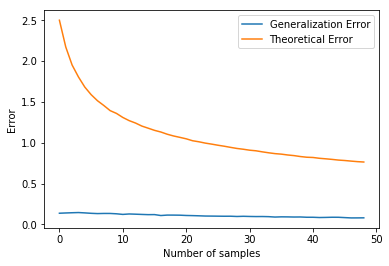

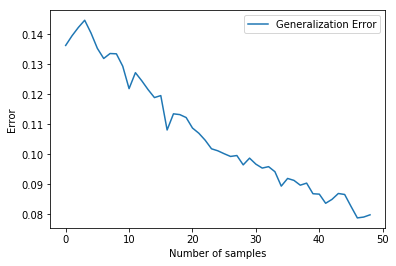

In [2]:
# Calculate theoretical errors
VCdim = 4 # See exercise 2
eta = 0.05 # 1 - eta confidence -> 95% confidence
theoreticalErrs = trainErrs + np.sqrt((VCdim*(np.log(2*nTrainSamples/VCdim)+1)-np.log(eta/4))/nTrainSamples)
# Plot everything
plt.figure(0)
plt.plot(genErrs, label="Generalization Error")
plt.plot(theoreticalErrs, label="Theoretical Error")
plt.xlabel("Number of samples")
plt.ylabel("Error")
plt.legend()
plt.figure(1)
plt.plot(genErrs, label="Generalization Error")
plt.xlabel("Number of samples")
plt.ylabel("Error")
plt.legend()
plt.show()

As can be seen from the first diagram the theoretical error margin is way too conservative, as was already noted in the lesson. In the second diagram it can be seen that the error is decreasing with a higher amount of samples.

## Exercise 4
Two input perceptron -> VCdim = m + 1 = 3

In [3]:
VCdim = 3
eta = 0.10 # 1 - eta confidence -> 90% confidence
target = 0.05
nSamples = np.arange(1, 20000)
errs = np.sqrt((VCdim*(np.log(2*nSamples/VCdim)+1)-np.log(eta/4))/nSamples)
idx = (np.abs(errs-target)).argmin()
print(idx)

13610


As can be seen the upper bound is 13610 samples in order to reach a 5% error rate. For a 2 input perceptron this value seems way too high.

## Exercise 5
a) With a low n the number of training examples is bound by the number of distinct rectangles possible. As n increases and the threshold of 1555 is reached the standard calculation with the VC dimension bounds the amount. This can be seen in the graph below.

1555


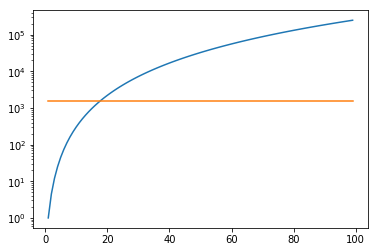

In [4]:
n = np.arange(1, 100)
nRects = 1/4 *  n*(n+1)**2

VCdim = 4 # See exercise 2
eta = 0.05 # 1 - eta confidence -> 95% confidence
target = 0.15
nSamples = np.arange(1, 20000)
errs = np.sqrt((VCdim*(np.log(2*nSamples/VCdim)+1)-np.log(eta/4))/nSamples)
idx = (np.abs(errs-target)).argmin()
print(idx)

plt.plot(n, nRects)
plt.plot(n, np.repeat(idx, len(n)))
plt.yscale('log')
plt.show()

b) Because an infinite amount of rectangles is possible, the upper bound is given by the VC dimension calculation for all n (1555).